# Who is typical voter for ..?

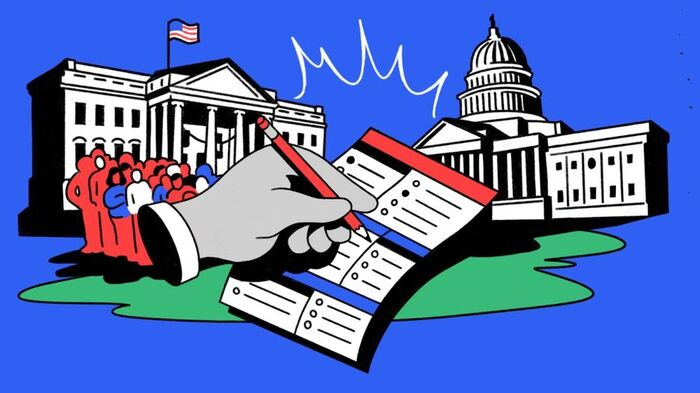

### Goal: to paint typical voter of each candidate.
By utilizing the provided data, conducting necessary cleaning, merging,\
and supplementing with additional relevant data, the aim is to "paint" a portrait\
of each candidate potential voter. Further elaborations have been fed into\
AI image generators to visualize them.

## Installation
To perform following data wrangling you need to install `requirements.txt` where are all packages used for this project

```bash
pip install requirements.txt
```

Moreover, there are 2 python files `Visuals.py` used for visualization\
and `Clustering.py` for data clustering.

`Data_cleaning.ipynb` notebook file contains\
information on how the data was cleaned and capable of\
and is capable of being reproduced if necessary.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import geopandas as gpd

In [81]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [82]:
import sys, os

In [83]:
script_dir = os.path.dirname('Data')
csv_file_path = os.path.join(script_dir, 'Data')

In [84]:
# Now you can import Visuals.py and Clustering.py
from Visuals import graphic
from Clustering import clustering_data

## Analysis
Further data been analyzed by splitting it in 2:
- Democrats data
- Republicans data

Some data been added and sources are given below.
Republicans in 2016:
- Colorado and North Dakota did not hold primaries/caucuses.
- Maine did not won any republican.


### Extra Data
- Minnesota: https://www.politico.com/2016-election/results/map/president/minnesota/
- DC Columbia: https://uselectionatlas.org/RESULTS/state.php?year=2016&fips=11&off=0&elect=0

In [85]:
columns_for_demografic_profile = ['winner',
                                  'Persons under 5 years, percent, 2014',
                                  'Black or African American alone, percent, 2014',
                                  'Persons under 18 years, percent, 2014',
                                  'Persons 65 years and over, percent, 2014',
                                  'Asian alone, percent, 2014','American Indian and Alaska Native alone, percent, 2014',
                                  'Female persons, percent, 2014',
                                  'White alone, percent, 2014',
                                  'White alone, not Hispanic or Latino, percent, 2014',
                                  ]

columns_for_demografic_profile_without_winner = [col for col in columns_for_demografic_profile if col != 'winner']

In [86]:
columns_for_analizes = ["Foreign born persons, percent, 2009-2013",
    "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
    "Persons per household, 2009-2013",
    "Per capita money income in past 12 months (2013 dollars), 2009-2013",
    "Persons below poverty level, percent, 2009-2013",
    ]

In [87]:
script_dir = os.path.dirname('Data')
csv_file_path = os.path.join(script_dir, 'Data')

# Democrat

In [88]:
democrat_votes_x_county_data = pd.read_csv(os.path.join(csv_file_path, "democrat_votes_x_county_data.csv"))

In [89]:
us_states = gpd.read_file("C:\\Users\\pelec\\Desktop\\Turing College\\DS\\1st sprint\\Capstone project\\Data\\cb_2016_us_state_500k\\cb_2016_us_state_500k.shp")
democrat_data_for_geo = us_states.merge(democrat_votes_x_county_data, how="inner", left_on="NAME", right_on="state")

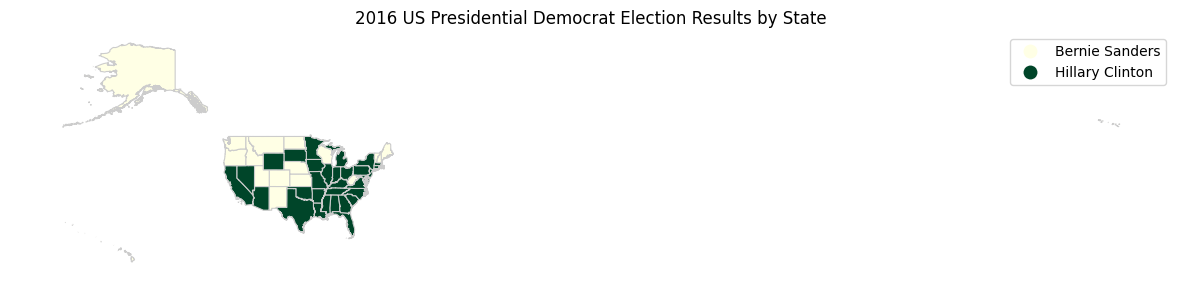

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
democrat_data_for_geo.plot(column='winner', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
plt.title("2016 US Presidential Democrat Election Results by State")

plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

plt.show()

From geographic map we are able to see that Hillary Clinton win most of states.\
Seems that states in South-East democrats more accepting H. Clinton ideas and votes for her.\
North-West mostly votes for Bernie Sanders.

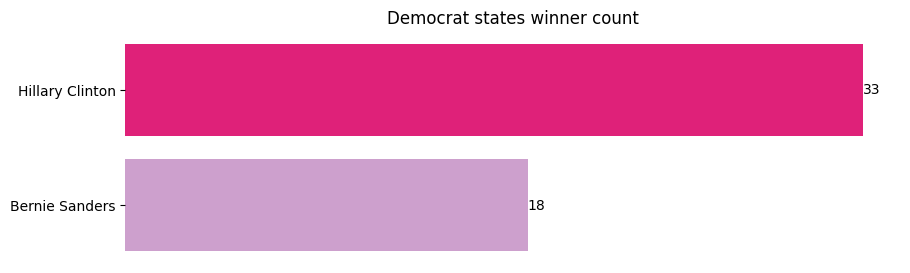

In [91]:
graphic(democrat_votes_x_county_data['winner'].value_counts(),'Democrat states winner count', 10, 3)

As results shows Hillary Clinton won 33 states, Barnie Sanders 18.

Hillary Clinton 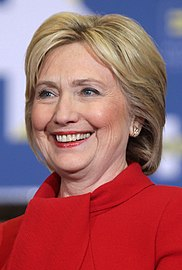\
Barnie Sanders 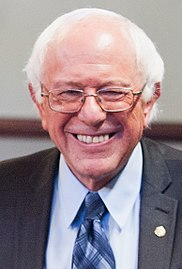

In [92]:
democrat_votes_x_county_data_county = pd.read_csv(os.path.join(csv_file_path, "democrat_votes_x_county_data_county.csv"))

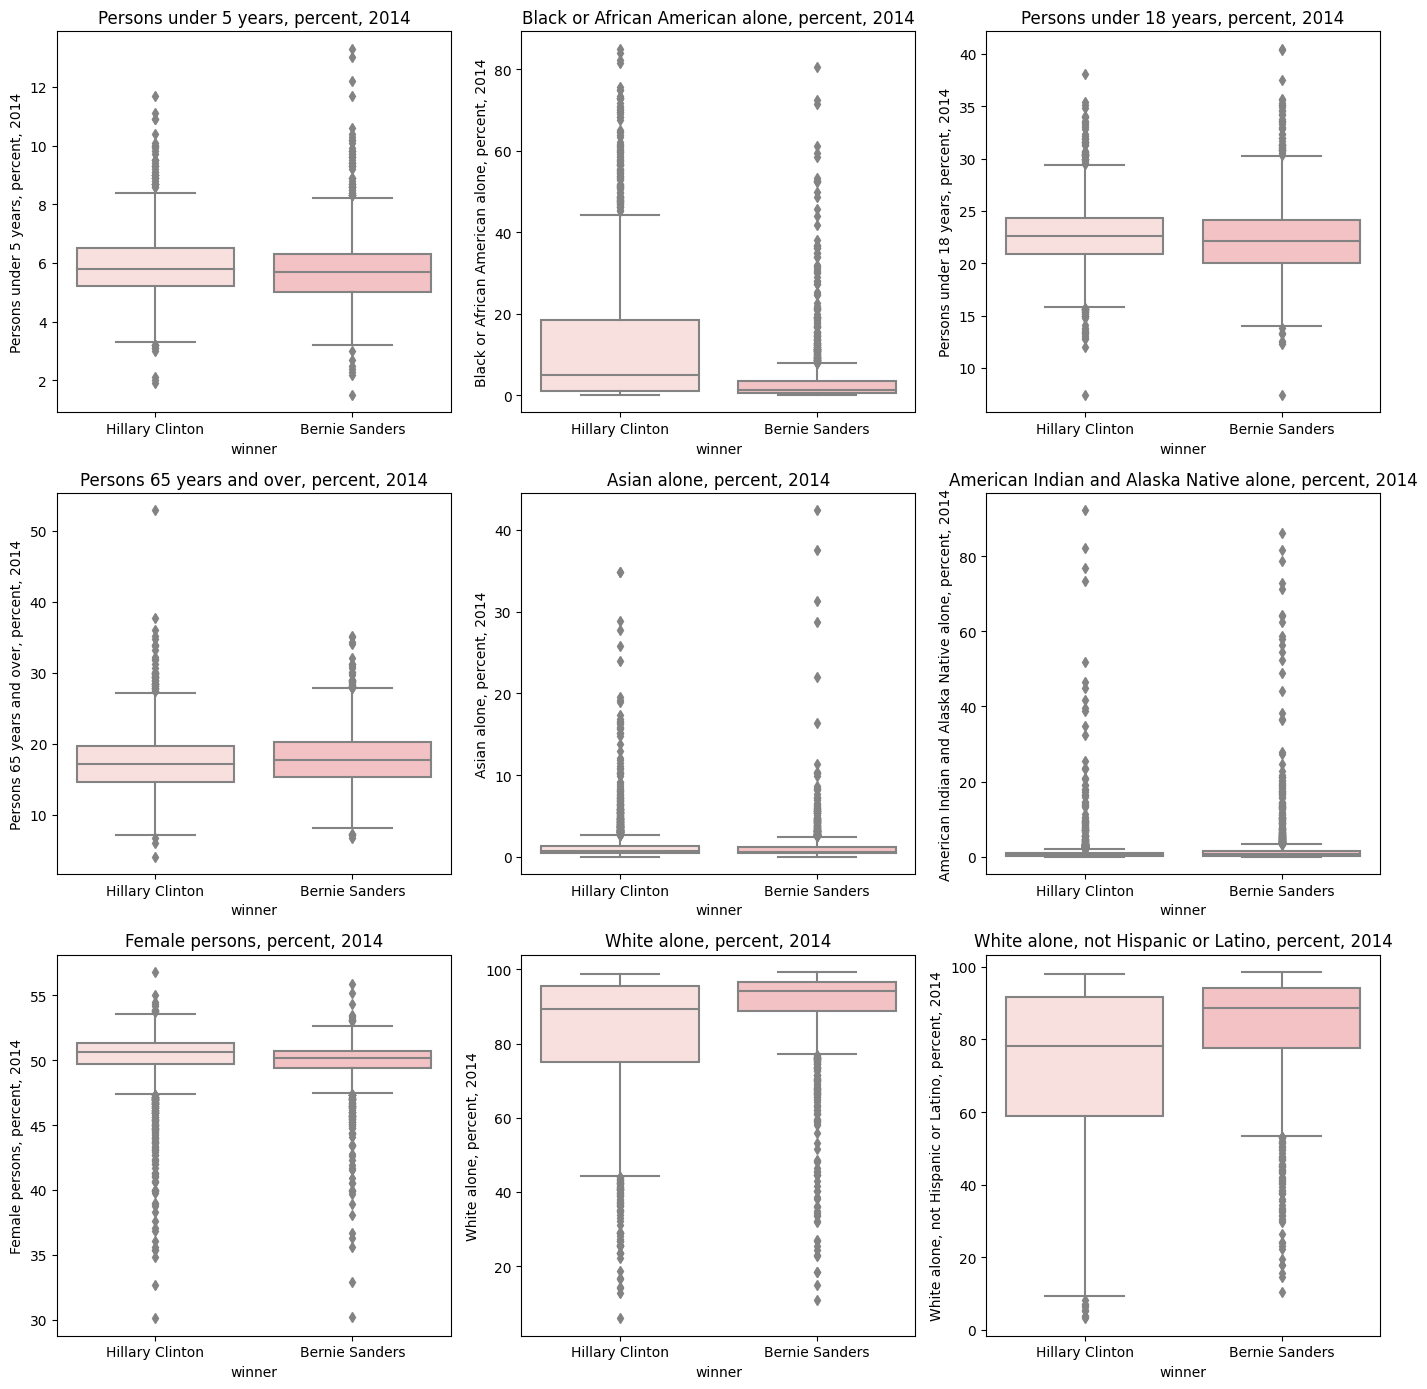

In [93]:
d_data_for_demografic_profile = democrat_votes_x_county_data_county[columns_for_demografic_profile]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 14))

# Iterate over each column name and create box plots
for i, column in enumerate(columns_for_demografic_profile_without_winner):
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    sns.boxplot(x='winner', y=column, data=d_data_for_demografic_profile, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()  # Adjust layout
plt.show()

### Hillary Clinton:
- From states observation we are able to see that Black or African people highly support H.Clinton.
- Females tend to highly support H.Clinton.
- Asian slightly more supportive for H.Clinton.
### Barnie Sanders:
- Highly supported by White alone, white alone not Hispanic or Latino people.
- People from North-West supports more B.Sanders.

In [94]:
democrat_votes_x_county_data_county = pd.read_csv(os.path.join(csv_file_path, "democrat_votes_x_county_data_county.csv"))

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5230216794153993


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5271468608513451


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


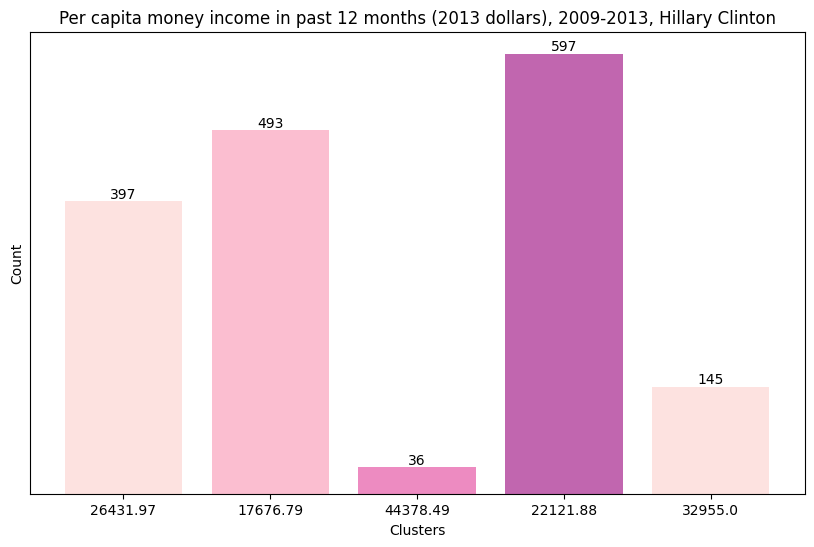

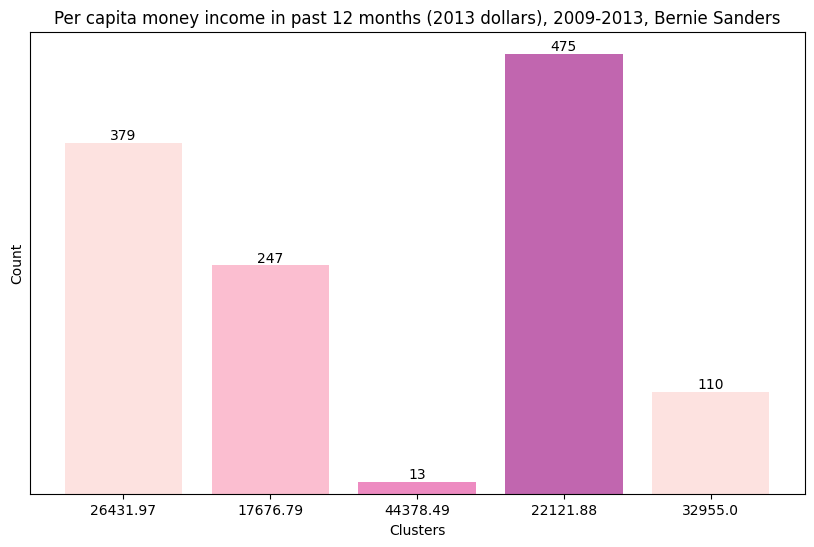

In [95]:
clustering_data(democrat_votes_x_county_data_county[["Per capita money income in past 12 months (2013 dollars), 2009-2013", "winner"]],
                "Per capita money income in past 12 months (2013 dollars), 2009-2013")

### Per capita money income in past 12 months (2013 dollars), 2009-2013
Hillary Clinton:
- Mostly supported by low and low to middle income people.
- Have support from high income people.

Barnie Sanders:
- Mostly supported by middle and low to middle income people.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5529576042664368
0.5444482611439251


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


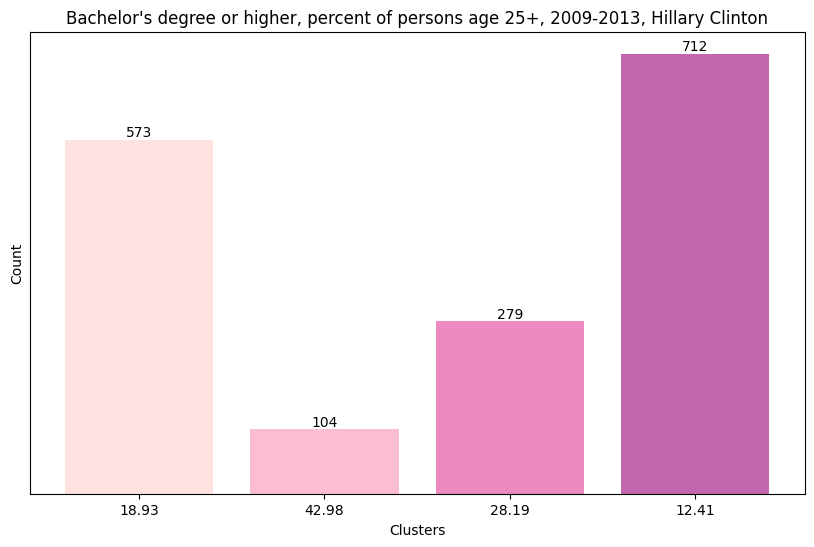

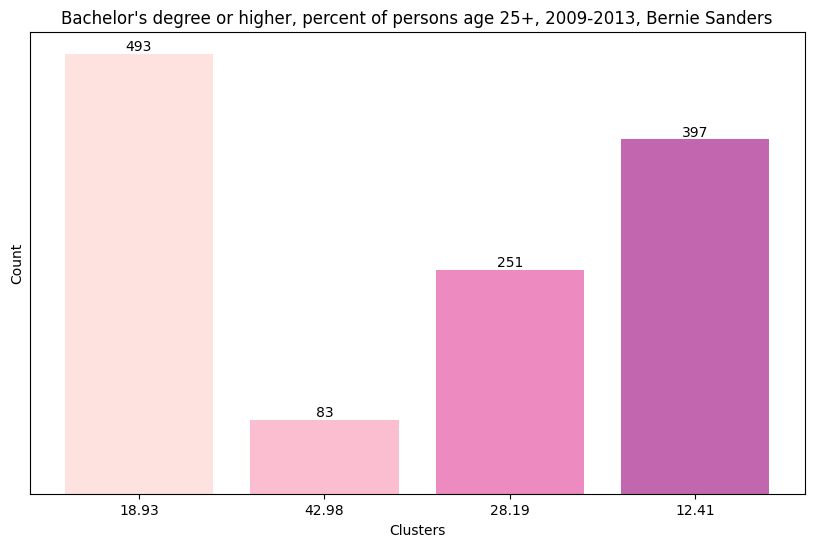

In [96]:
clustering_data(democrat_votes_x_county_data_county[["Bachelor's degree or higher, percent of persons age 25+, 2009-2013", "winner"]],
                "Bachelor's degree or higher, percent of persons age 25+, 2009-2013")

### Bachelor's degree or higher, percent of persons age 25+, 2009-2013
Hillary Clinton:
- Mostly supported by counties where are low percentage of people having at least bachelor degree.

Barnie Sanders:
- Have a strong support by counties where are higher percentage of people having at least bachelor degree comparing to H.Clinton supporting counties.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6478501566563984
0.6303885997723576


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


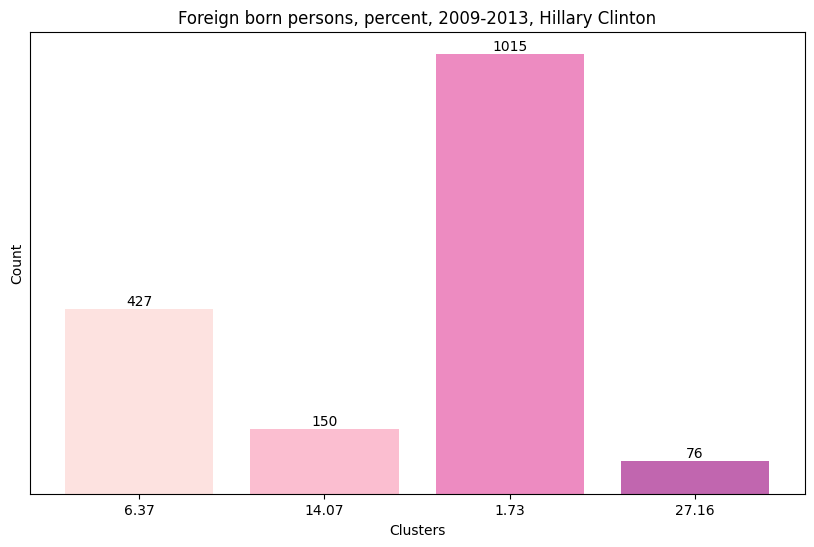

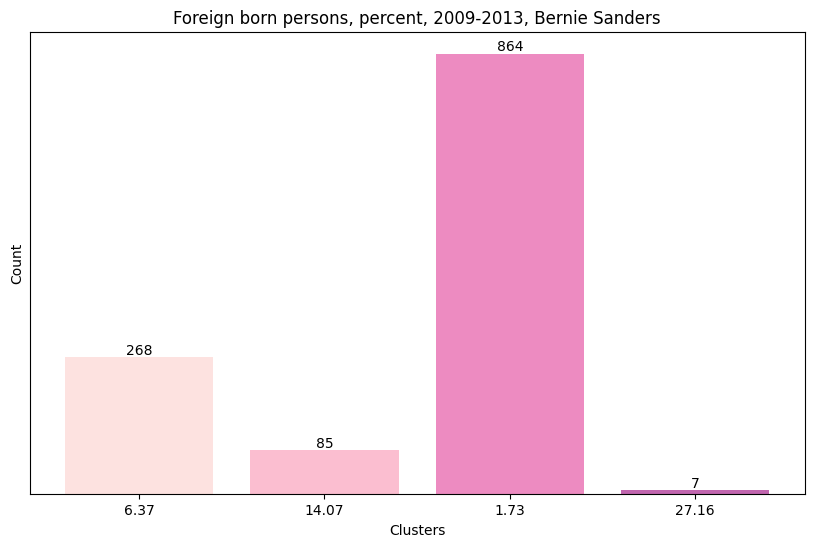

In [97]:
clustering_data(democrat_votes_x_county_data_county[["Foreign born persons, percent, 2009-2013", "winner"]],
                "Foreign born persons, percent, 2009-2013")

### Foreign born persons, percent, 2009-2013
Hillary Clinton:
- Mostly supported by counties where are low percentage of foreign born people.
- Have a lot of support from counties where are high percentage of foreign born people.

Barnie Sanders:
- Mostly supported by counties where are low percentage of foreign born people.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.525224882187321
0.516523960373125


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


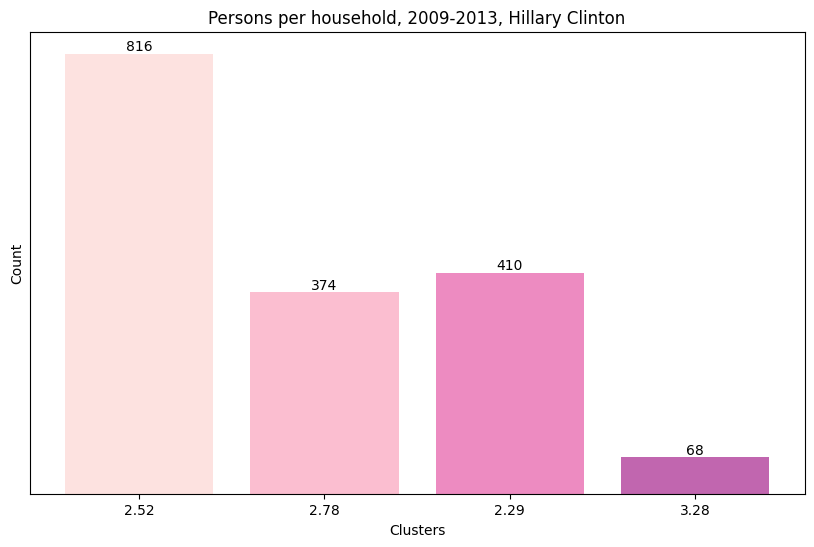

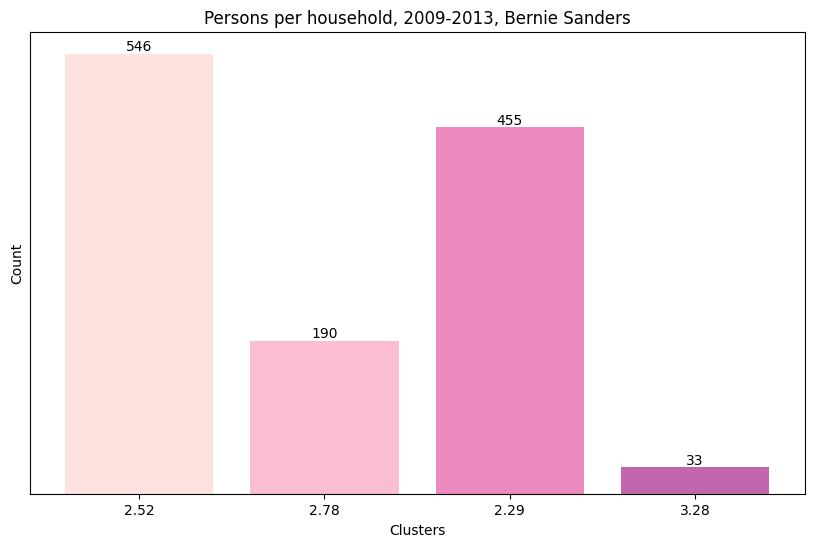

In [98]:
clustering_data(democrat_votes_x_county_data_county[["Persons per household, 2009-2013", "winner"]],
                "Persons per household, 2009-2013")

### Persons per household, 2009-2013
Hillary Clinton:
- Mostly supported by people with large families.

Barnie Sanders:
- Mostly supported by small size families like couples or single people.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5272816554834237
0.5282149014825178


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


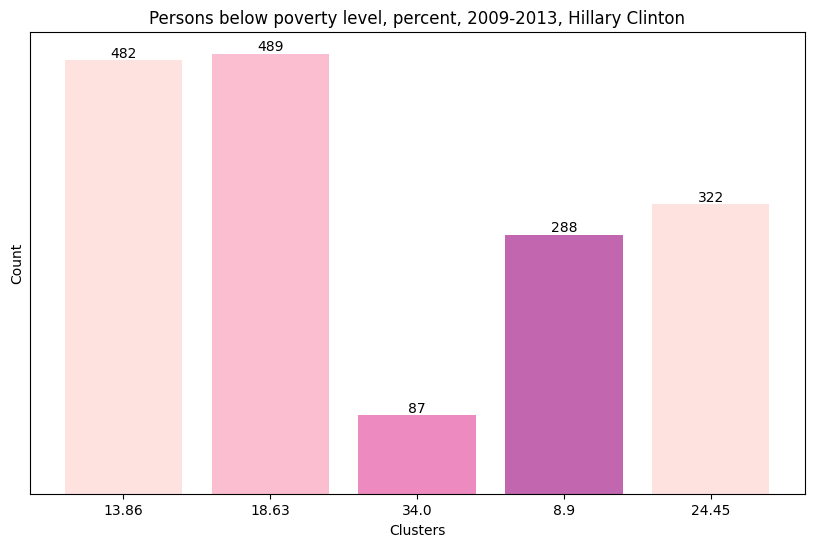

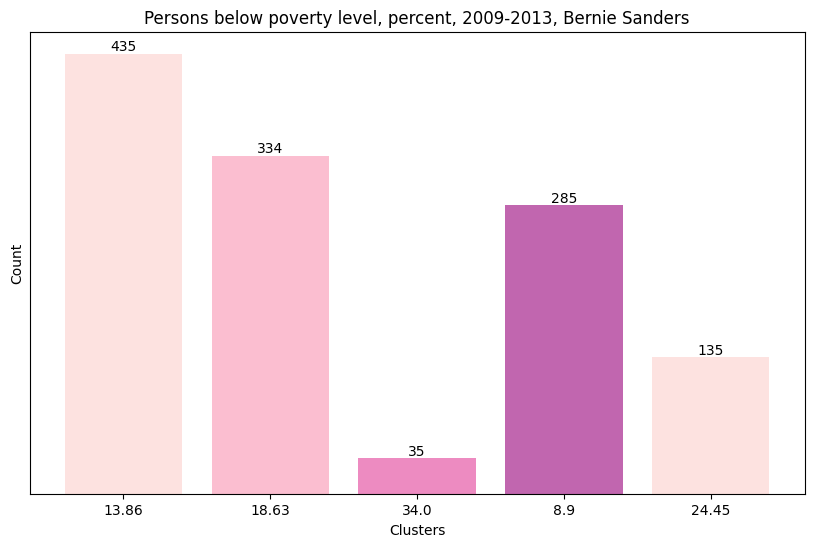

In [99]:
clustering_data(democrat_votes_x_county_data_county[["Persons below poverty level, percent, 2009-2013", "winner"]],
                "Persons below poverty level, percent, 2009-2013")

### Persons below poverty level, percent, 2009-2013
Hillary Clinton:
- Mostly supported by counties where are relative high percentage of people below poverty level.

Barnie Sanders:
- Mostly supported by counties where are relative low percentage of people below poverty level.

## Voters portrais:


Hillary Clinton:
- Black or African female.
- Likely from counties with a relatively high percentage of people below the poverty level.
- Tends to be from larger families.
- Attracts support from areas with both low and high percentages of foreign-born individuals.
- Typically supported by individuals with lower educational attainment.
- Draws support from a mix of low and low to middle-income individuals, including some high-income supporters.
- 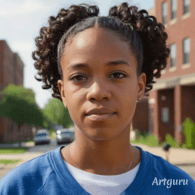

Barnie Sanders:
- White alone person from North-West of America.
- Hails from counties with a relatively low percentage of people below the poverty level.
- Often part of small-sized families like couples or single individuals.
- Typically from areas with a low percentage of foreign-born individuals.
- Draws strong support from counties with higher percentages of individuals holding at least a bachelor's degree compared to Clinton's supporters.
- Mainly supported by middle and low to middle-income individuals.
- 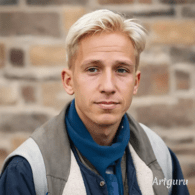

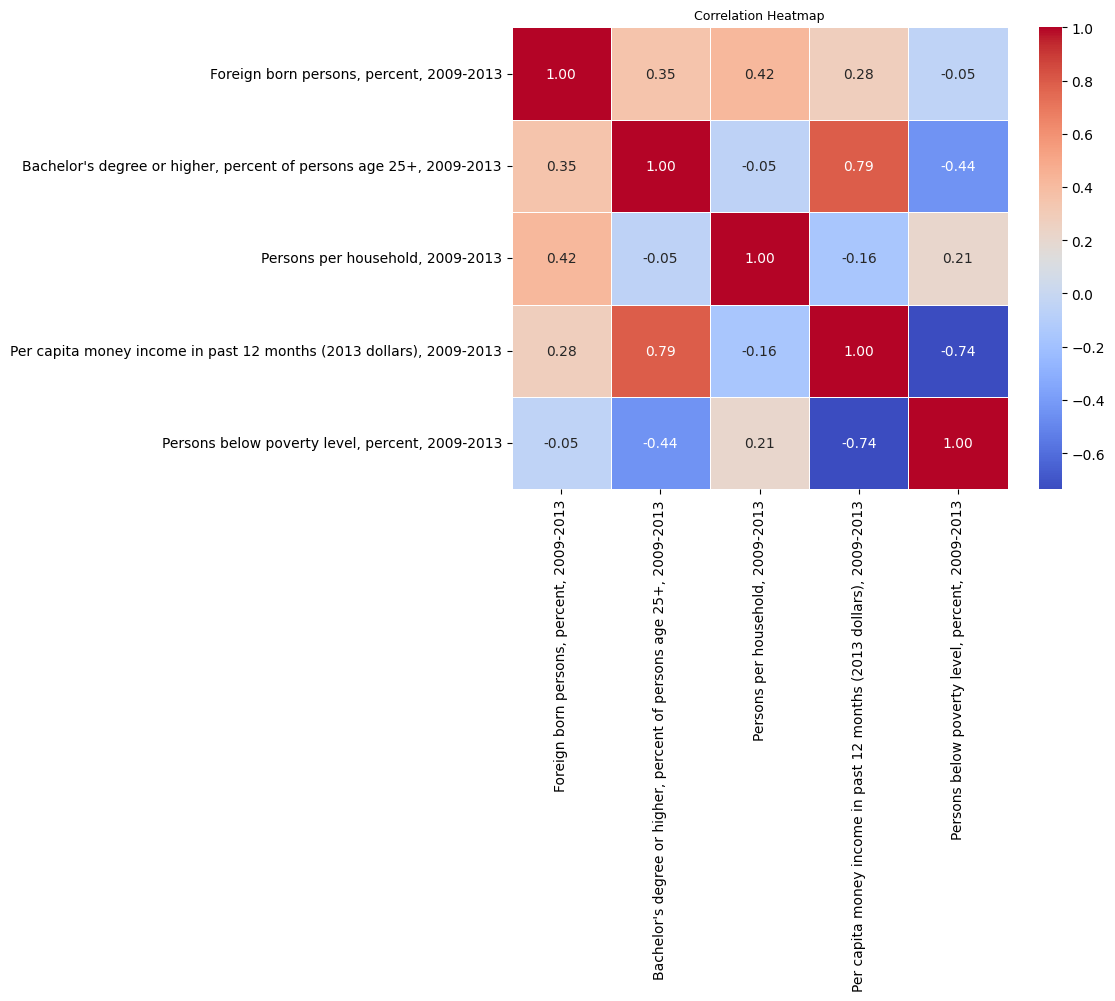

In [100]:
# Calculate correlation matrix
d_correlation_matrix = democrat_votes_x_county_data_county[columns_for_analizes].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(d_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=9)
plt.show()

- From correlation matrix we are able to see that bachelor degree and per capital money income has strong positive correlation.
- Meanwhile poverty level and per capital money income has a strong negative correlation.

In [101]:
X = democrat_votes_x_county_data_county[columns_for_analizes]
y = democrat_votes_x_county_data_county['winner']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 60.79%


Based on 5 features:
- Persons below poverty level, percent, 2009-2013.
- Persons per household, 2009-2013.
- Foreign born persons, percent, 2009-2013.
- Bachelor's degree or higher, percent of persons age 25+, 2009-2013.
- Per capita money income in past 12 months (2013 dollars), 2009-2013.\

The XGBoost machine learning algorithm was utilized, yielding an accuracy result of 60.79%\
when predicting the winner based on five selected features.\
This accuracy rate is relatively low, suggesting that alternative features should be considered.

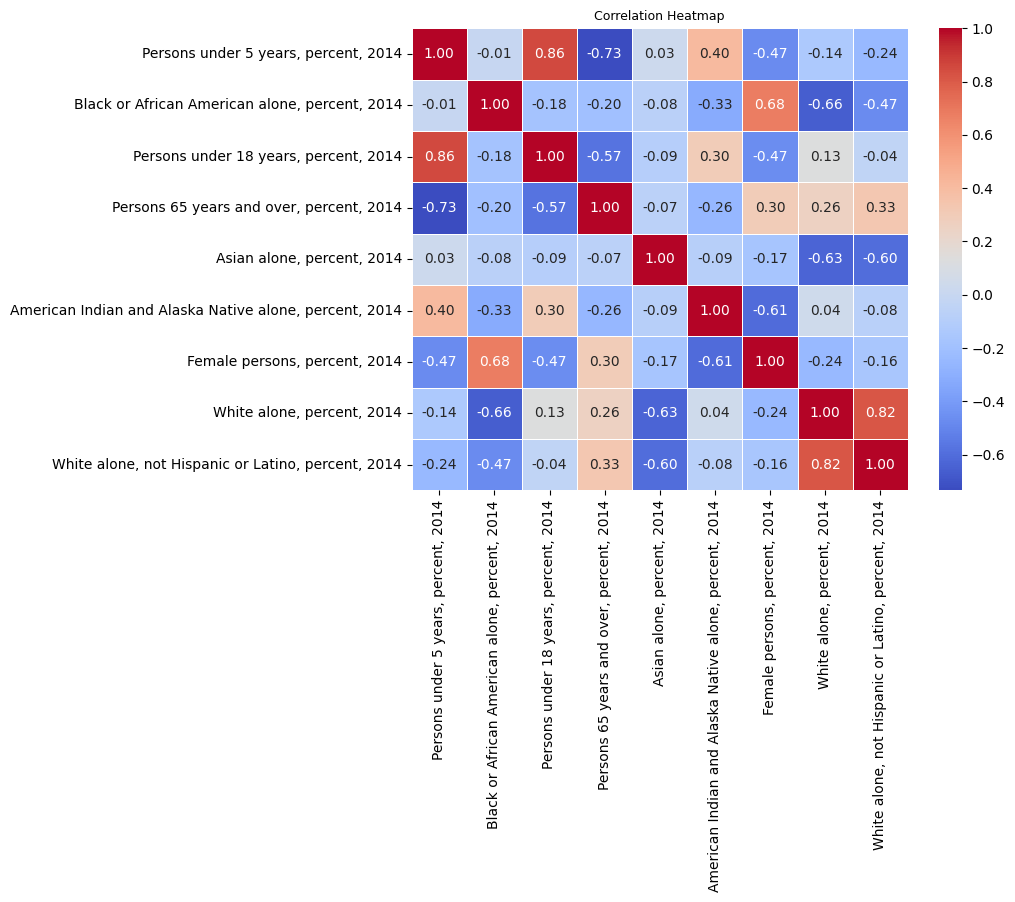

In [102]:
# Calculate correlation matrix
d_correlation_matrix_2 = democrat_votes_x_county_data[columns_for_demografic_profile_without_winner].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(d_correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=9)
plt.show()

From correlation matrix above we are able to see:\
- Strong correlation between Person under 5 years, percent, 2014 and Person under 18 years, percent, 2014.\
This correlation might be due to overlapping, 5 years people might be included in people under 18 years.
- Strong negative correlation between Person under 18 years, percent, 2014 and Person 65 years and over, percent 2014.\
Negative correlation shows due to age priorities regarding living area. 

In [103]:
X = democrat_votes_x_county_data[columns_for_demografic_profile_without_winner]
y = democrat_votes_x_county_data['winner']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.82%


Based on 9 features:

The XGBoost machine learning algorithm was utilized, yielding an accuracy result of 81.82%\
when predicting the winner based on nine selected features.\
This accuracy rate is relatively high, suggesting that features with strong high and strong negative correlations\
could be excluded due to biases.

# Respublican

In [104]:
respublican_votes_x_county_data = pd.read_csv(os.path.join(csv_file_path, "republican_votes_x_county_data.csv"))

In [105]:
us_states = gpd.read_file("C:\\Users\\pelec\\Desktop\\Turing College\\DS\\1st sprint\\Capstone project\\Data\\cb_2016_us_state_500k\\cb_2016_us_state_500k.shp")
respublican_data_for_geo = us_states.merge(respublican_votes_x_county_data, how="inner", left_on="NAME", right_on="state")

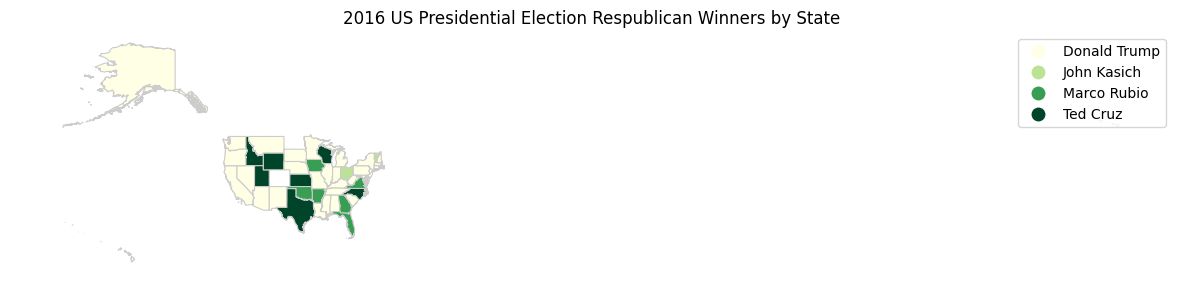

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
respublican_data_for_geo.plot(column='winner', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
plt.title("2016 US Presidential Election Respublican Winners by State")

plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

plt.show()

From map we are able to see that Donald Trump won in majority of states.
John Kasich won the least states.

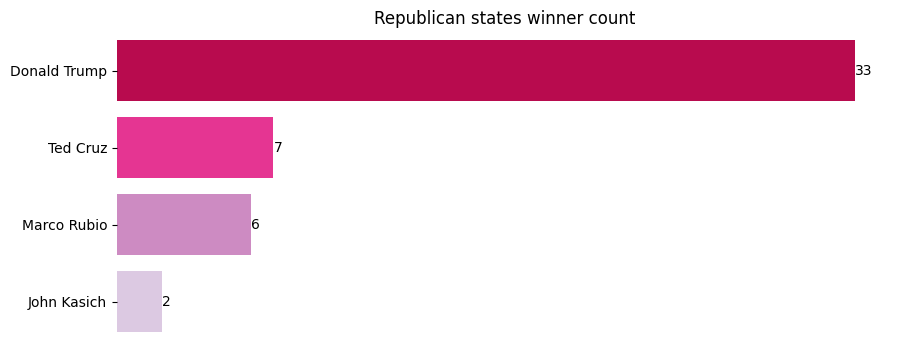

In [107]:
graphic(respublican_data_for_geo['winner'].value_counts(),'Republican states winner count', 10, 4)

Donald Trump won in 33 States\
Meanwhile second is Ted Cruz with only 7 won states

Donald Trump 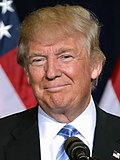\
Ted Cruz     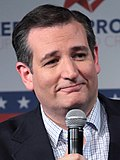\
Marco Rubio  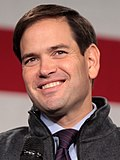\
John Kasich  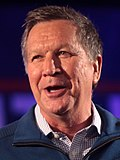

In [108]:
republican_votes_x_county_data_county = pd.read_csv(os.path.join(csv_file_path, "republican_votes_x_county_data_county.csv"))

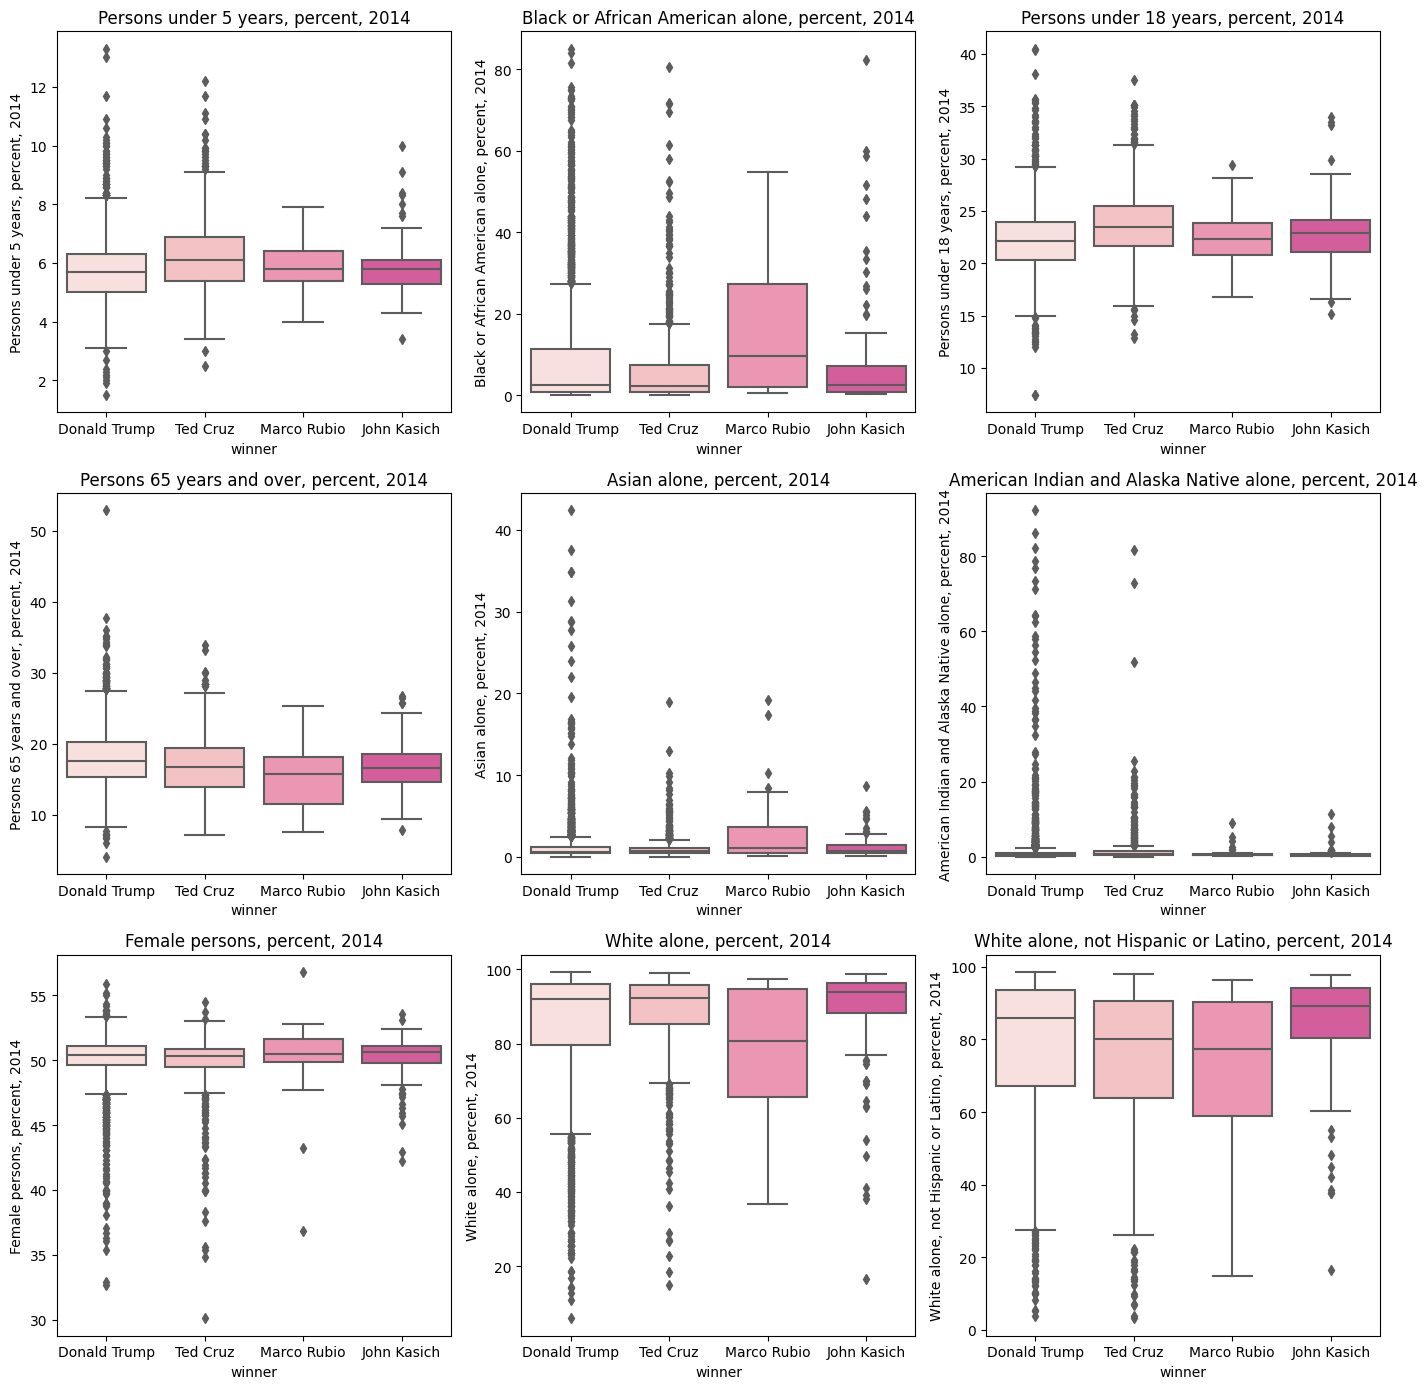

In [109]:
r_data_for_demografic_profile = republican_votes_x_county_data_county[columns_for_demografic_profile]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 14))

# Iterate over each column name and create box plots
for i, column in enumerate(columns_for_demografic_profile_without_winner):
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    sns.boxplot(x='winner', y=column, data=r_data_for_demografic_profile, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()  # Adjust layout
plt.show()

Donald Trump:
- Supported mostly by females.
- Supported by alone asians.

Marco Rubio:
- Mostly supported by black or african american people.
- The least supported among white alone, not hipanic or latino people.

Ted Cruz:
- Highly supported by persons under 18 years.
- The most votes got from persons under 5 years.

John Kasich:
- Highly supported by white alone, not hispanic or latino people.
- The least popular across America indian and Alaska native alone people.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5232200350543934
0.5255117058373929


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


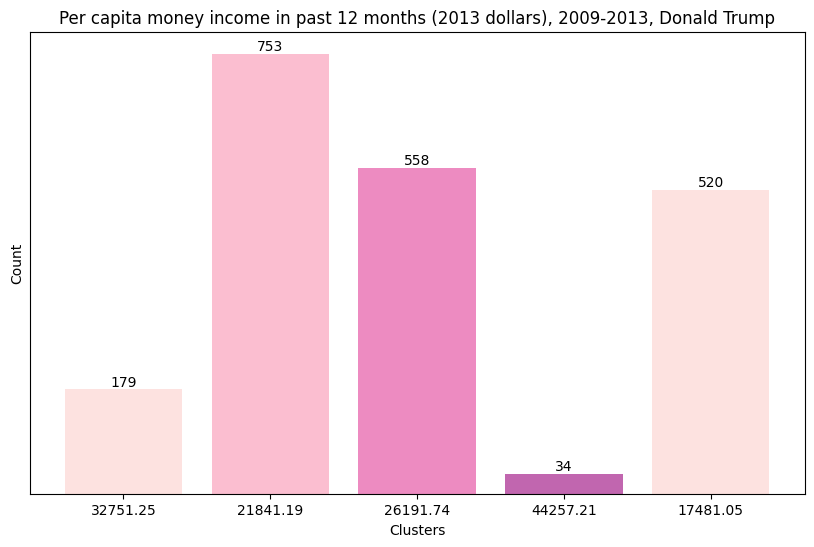

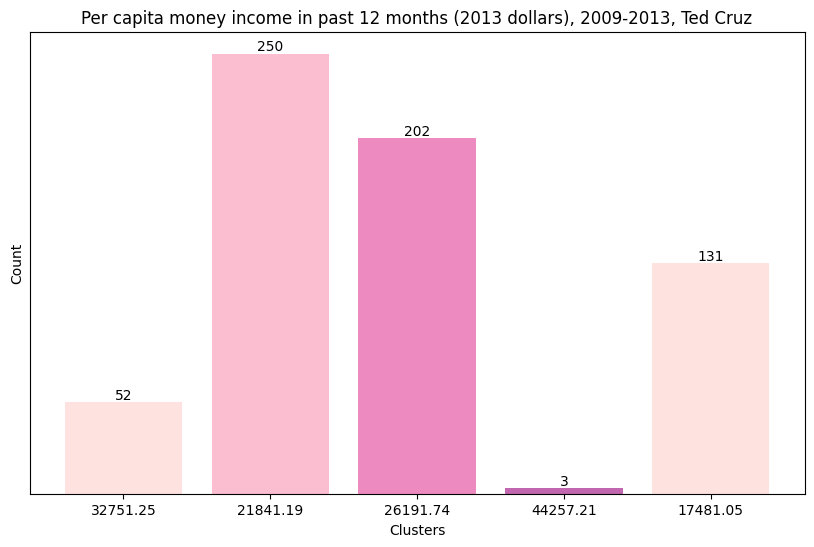

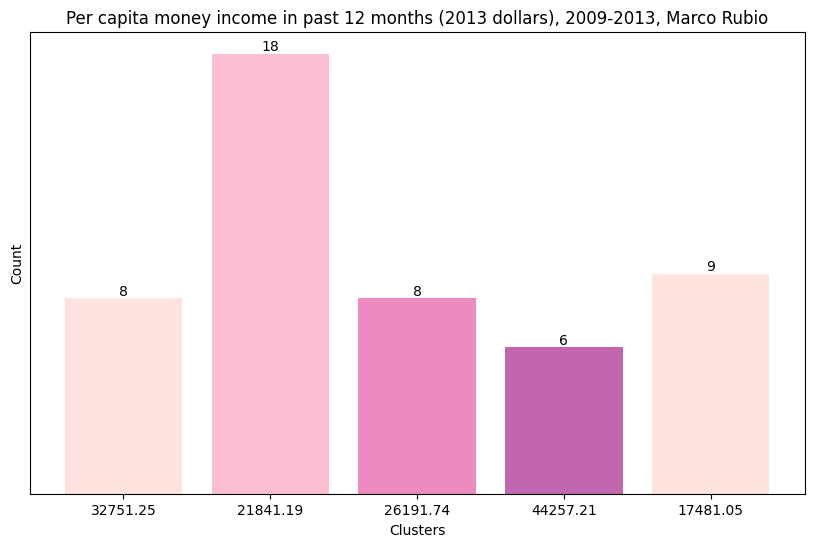

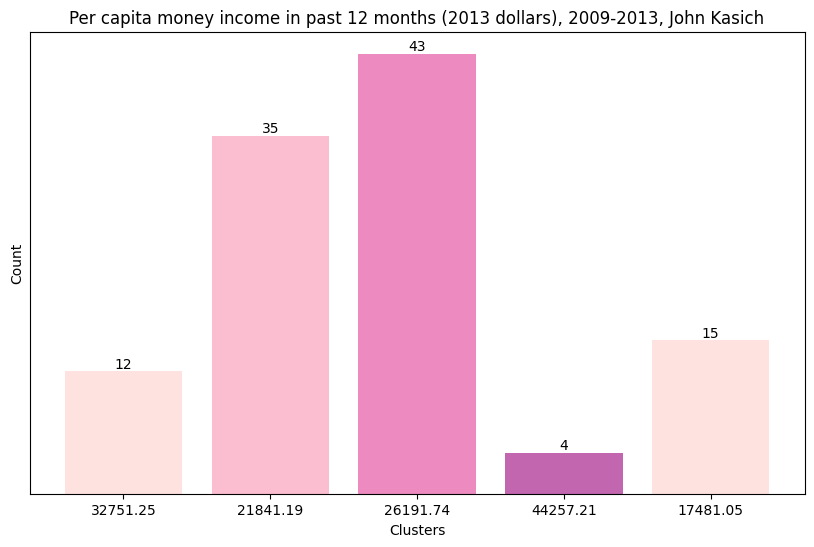

In [110]:
clustering_data(republican_votes_x_county_data_county[["Per capita money income in past 12 months (2013 dollars), 2009-2013", "winner"]],
                "Per capita money income in past 12 months (2013 dollars), 2009-2013")

### Per capita money income in past 12 months (2013 dollars), 2009-2013
Donald Trump:
- Mostly supported by low and middle to low income.

Ted Cruz:
- Mostly supported by middle to low income people.

Marco Rubio:
- Mostly supported by middle to low income people.
- Highly supported by high income people not like other candidates.

John Kasich:
- Mostly supported by middle income people.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5532677773453459
0.5397130241454625


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


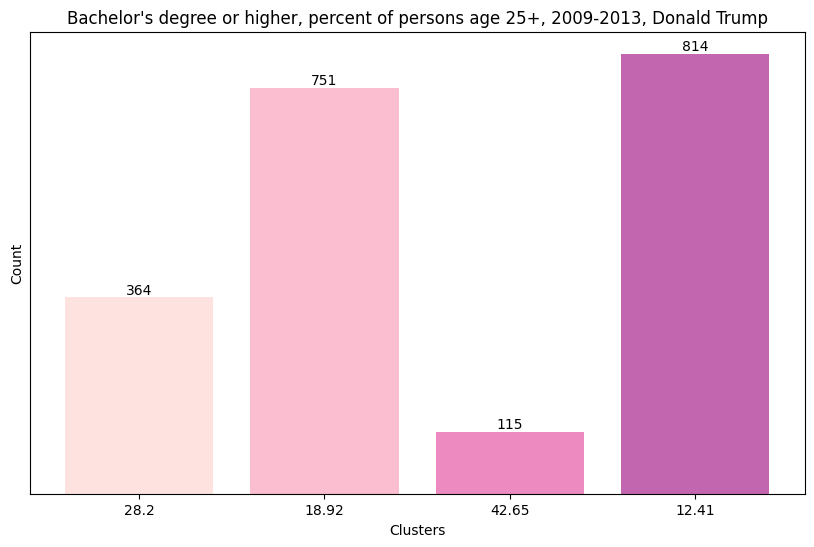

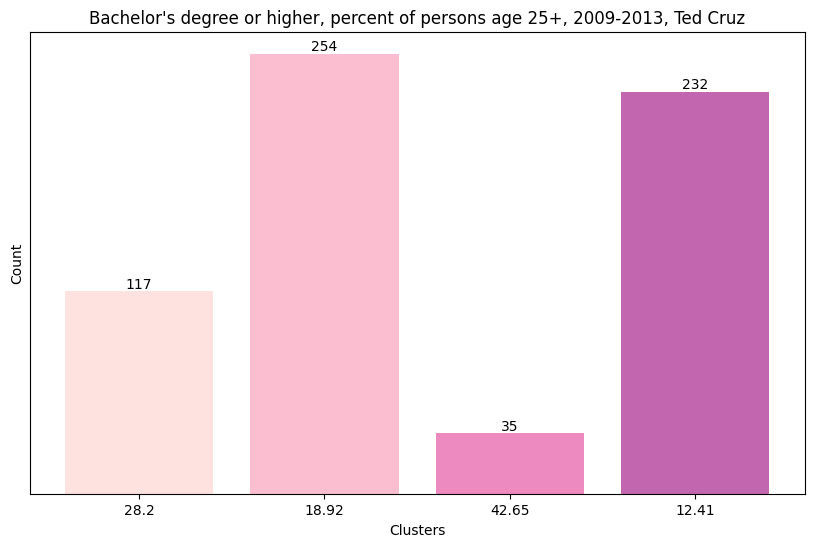

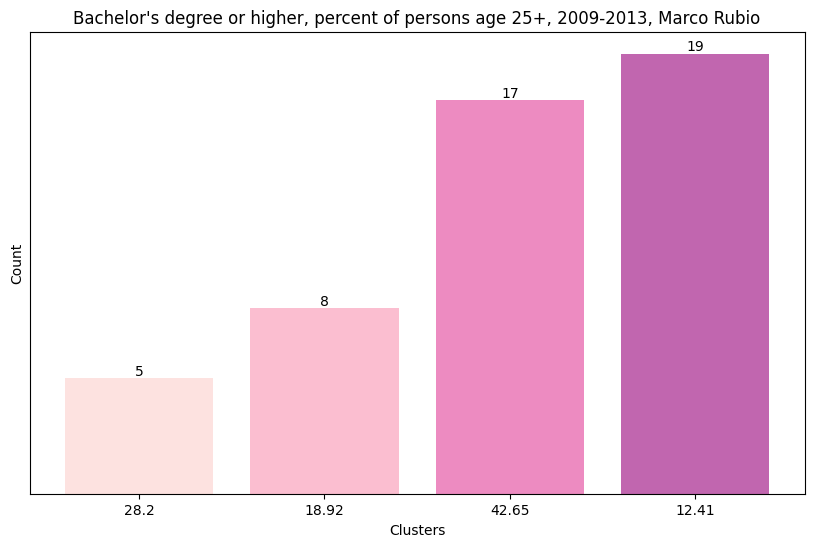

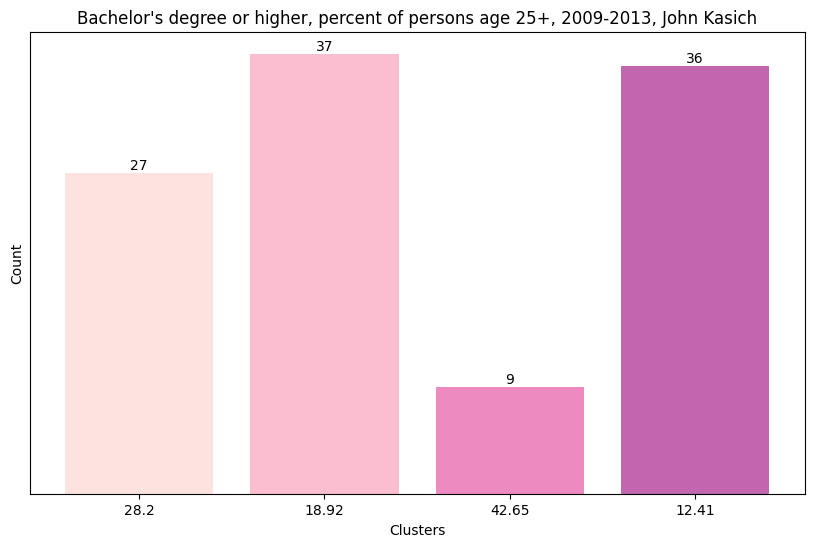

In [111]:
clustering_data(republican_votes_x_county_data_county[["Bachelor's degree or higher, percent of persons age 25+, 2009-2013", "winner"]],
                "Bachelor's degree or higher, percent of persons age 25+, 2009-2013")

### Bachelor's degree or higher, percent of persons age 25+, 2009-2013
Donald Trump:
- Highly supported by counties with low and middle to low % of people in counties having at least bachelor degree.

Ted Cruz:
- Highly supported by counties with low and middle to low % of people in counties having at least bachelor degree.

Marco Rubio:
- Highly supported by counties with high and low % of people in counties having at least bachelor degree.

John Kasich:
- Mostly supported by counties with low, middle to low, middle to high % of people in counties having at least bachelor degree.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6504263795809136
0.635837190398381


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


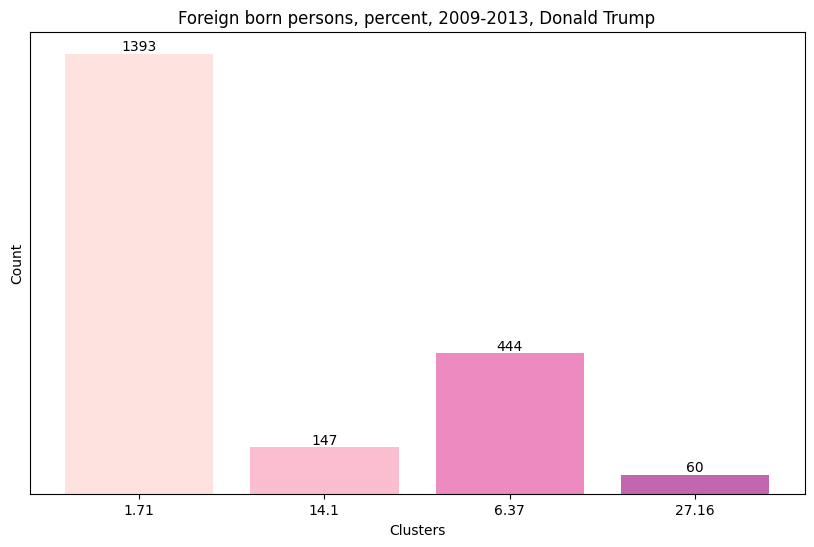

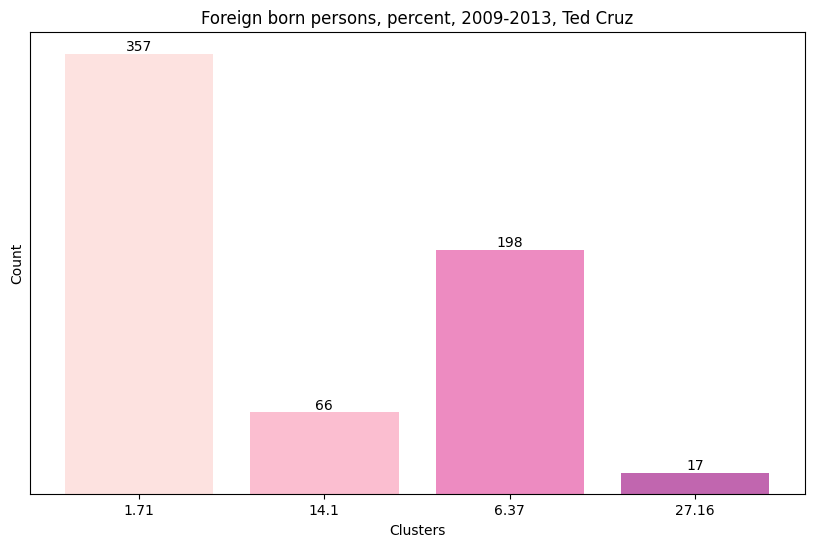

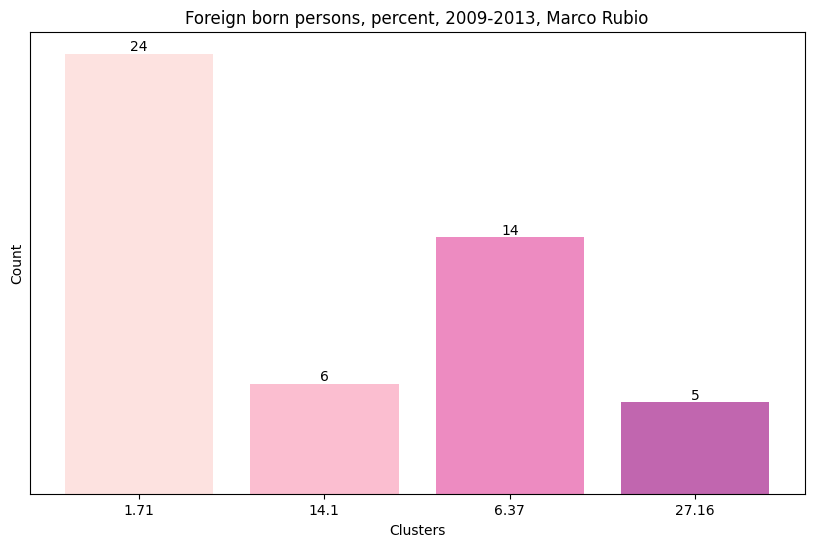

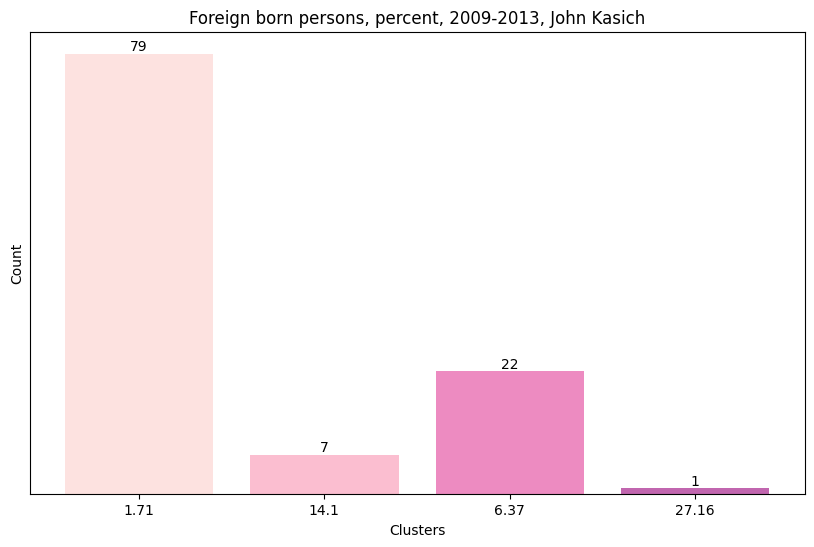

In [112]:
clustering_data(republican_votes_x_county_data_county[["Foreign born persons, percent, 2009-2013", "winner"]],
                "Foreign born persons, percent, 2009-2013")

### Foreign born persons, percent, 2009-2013

From data we are able to see that most counties in America has low percentage of foreign born people

Donald Trump:
- Highly supported by counties with low (1.71%) percentage of foreign born people.

Ted Cruz:
- Highly supported by counties with 6.37% foreign born people.

Marco Rubio:
- Highly supported by counties with higher (14.1% and 27.16%) foreign born people.

John Kasich:
- Mostly supported by counties with low percentage of foreign born people.
- The least supported with counties with high percentage of foreign born people comparing with other candidates.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5268165877582658
0.5144460754126948


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


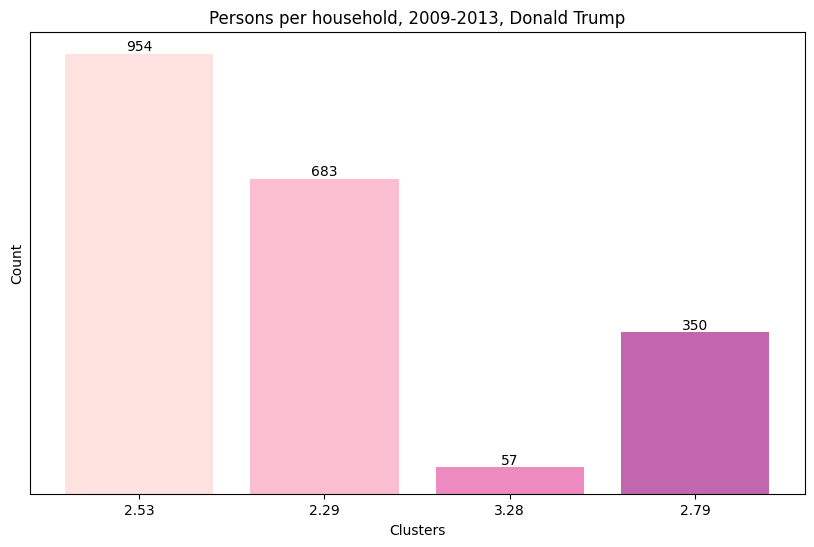

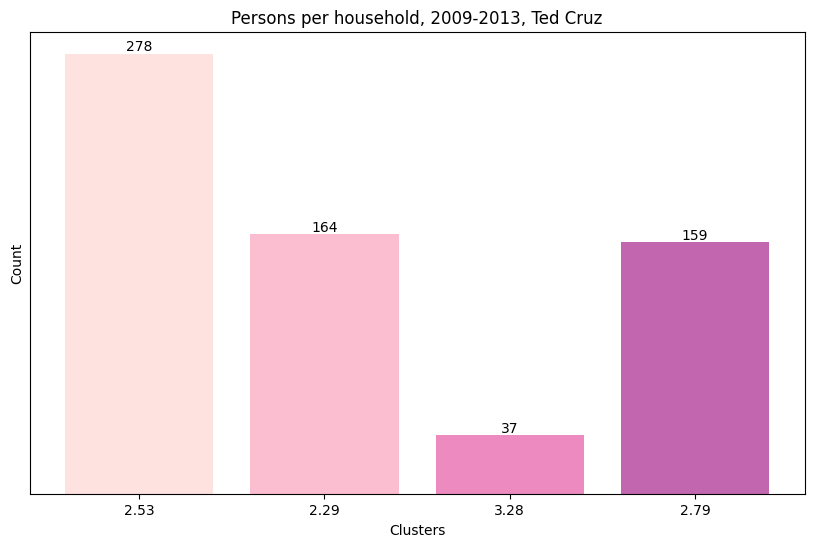

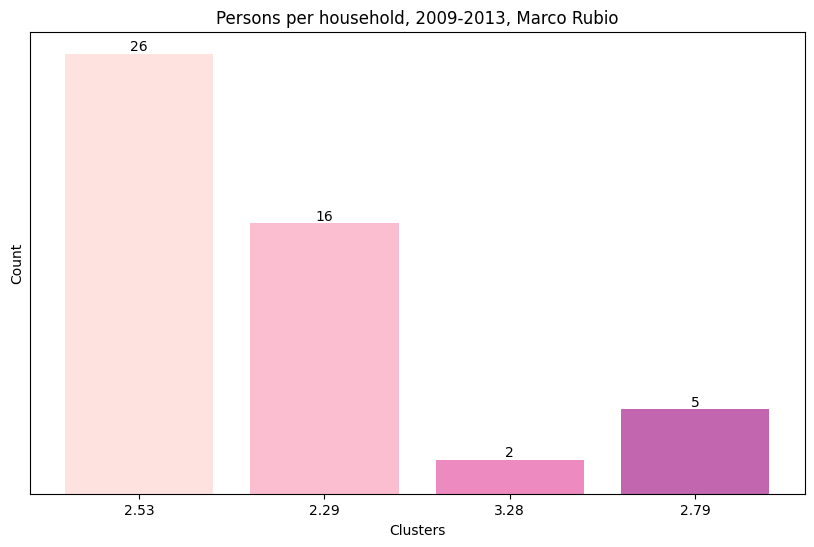

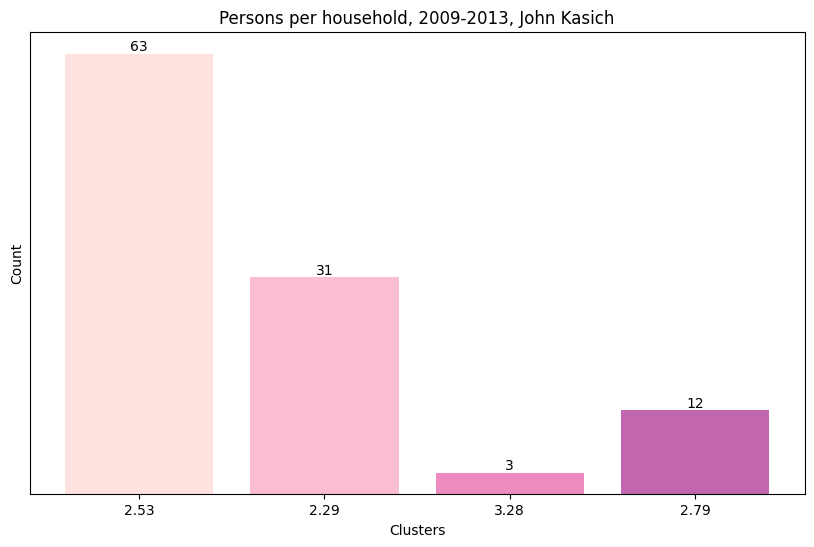

In [113]:
clustering_data(republican_votes_x_county_data_county[["Persons per household, 2009-2013", "winner"]],
                "Persons per household, 2009-2013")

### Persons per household, 2009-2013

From data we are able to see that most counties in America has around 2.53 persons per household.

Donald Trump:
- Highly supported by counties where are more couples without children or single parents with 1 or 2 children.

Ted Cruz:
- Highly supported by counties where are more families with children.

Marco Rubio:
- Highly supported by counties where are more couples without children or single parents with 1 or 2 children.

John Kasich:
- Mostly supported by counties where are more families with children.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5269199026713237
0.52787264543553


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


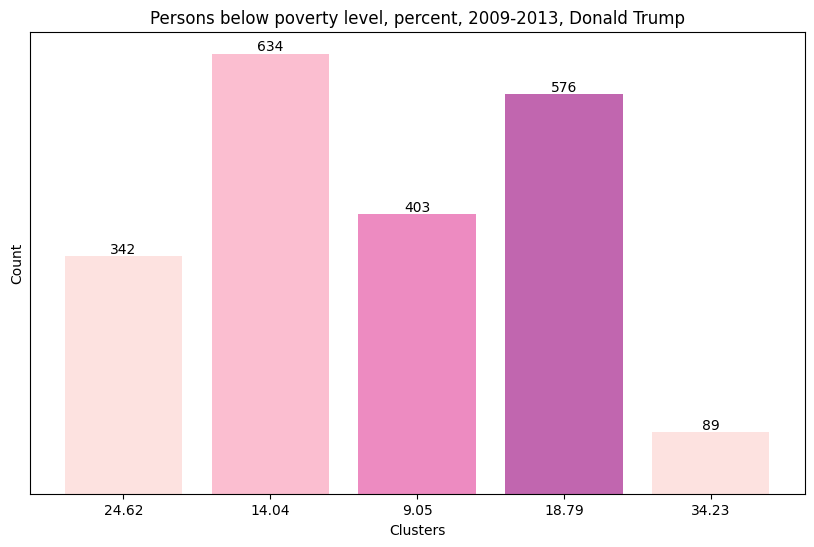

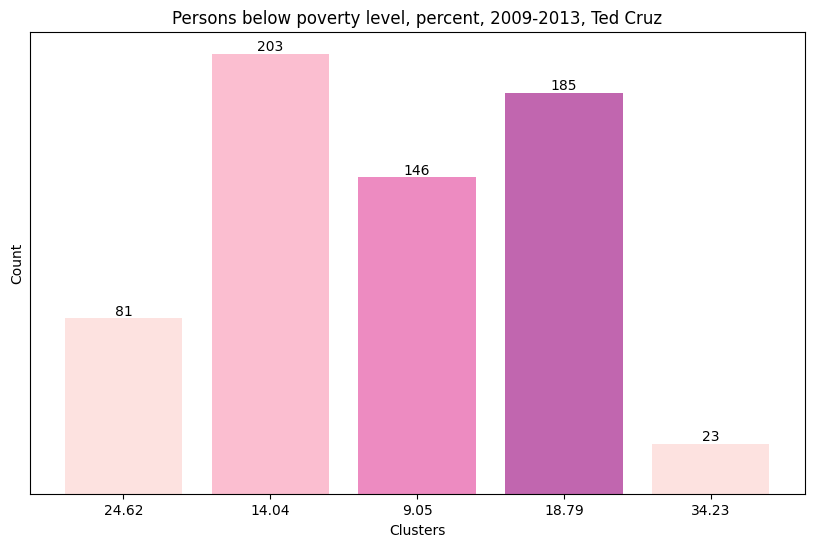

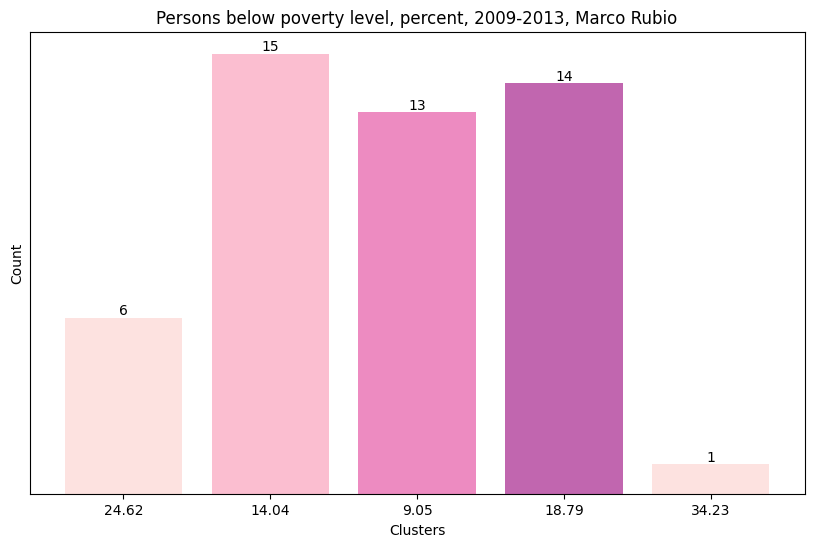

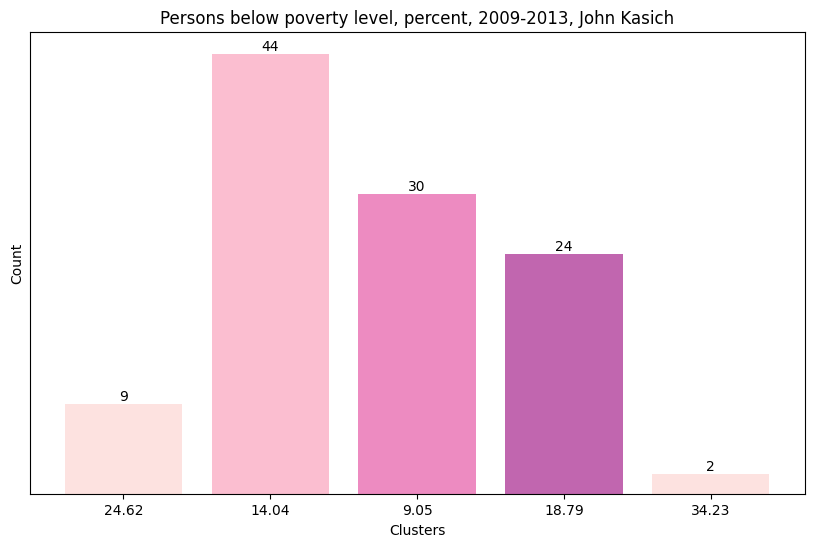

In [114]:
clustering_data(republican_votes_x_county_data_county[["Persons below poverty level, percent, 2009-2013", "winner"]],
                "Persons below poverty level, percent, 2009-2013")

### Persons below poverty level, percent, 2009-2013

Donald Trump:
- Highly supported by counties where are middle (14.04%, 18.79%) and middle to high (24.62%) percentage people below poverty level.

Ted Cruz:
- Highly supported by counties where are low percentage people below poverty level comparing with other candidates.

Marco Rubio:
- Highly supported by counties where are low percentage people below poverty level comparing with other candidates.

John Kasich:
- Mostly supported by counties where are middle to low percentage people below poverty level.

## Voters portraits

Donald Trump:
- Female.
- Likely from a struggling community with middle to middle-high poverty rates.
- Lives in a smaller household, often couples without children or single parents with 1 or 2 children.
- Prefers homogenous communities with fewer foreign-born individuals.
- Has lower educational attainment.
- Falls into the middle to low income brackets.
- 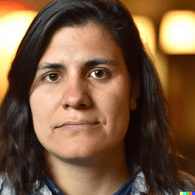

Ted Cruz:
- Hipanic or latino.
- Hails from a community with comparatively lower poverty rates.
- Often part of a family with children.
- May come from areas with lower percentages of foreign-born individuals.
- Tends to have lower educational attainment.
- Falls into the middle to low income brackets.
- 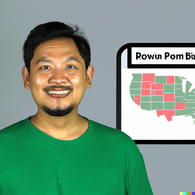

Marco Rubio:
- Black or African.
- Likely from a community with relatively low poverty rates.
- Lives in a smaller household.
- May come from diverse communities in terms of foreign-born individuals.
- Reflects varied educational backgrounds.
- Has a mix of middle to low and high incomes.
- 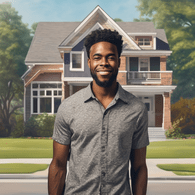

John Kasich:
- America indian and Alaska native.
- Comes from communities with moderate poverty rates.
- Typically part of a family with children.
- Prefers less diverse communities.
- Reflects varied educational backgrounds.
- Falls into the middle-income bracket.
- 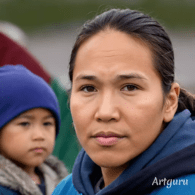

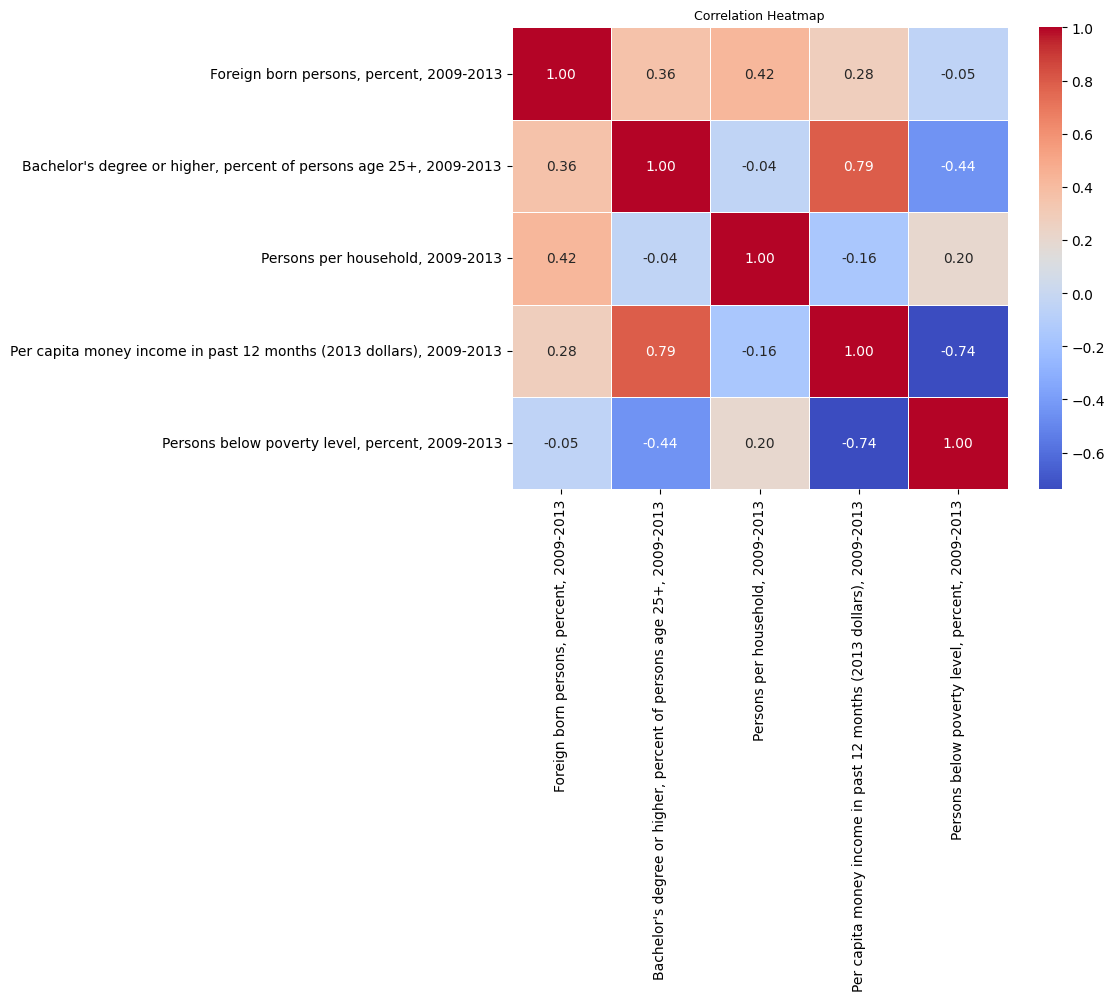

In [115]:
# Calculate correlation matrix
r_correlation_matrix = republican_votes_x_county_data_county[columns_for_analizes].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(r_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=9)
plt.show()

- From correlation matrix we are able to see that bachelor degree and per capital money income has strong positive correlation.
- Meanwhile poverty level and per capital money income has a strong negative correlation.

In [116]:
X = republican_votes_x_county_data_county[columns_for_analizes]
y = republican_votes_x_county_data_county['winner']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 66.73%


Based on 5 features:
- Persons below poverty level, percent, 2009-2013.
- Persons per household, 2009-2013.
- Foreign born persons, percent, 2009-2013.
- Bachelor's degree or higher, percent of persons age 25+, 2009-2013.
- Per capita money income in past 12 months (2013 dollars), 2009-2013.\

The XGBoost machine learning algorithm was utilized, yielding an accuracy result of 66.73%\
when predicting the winner based on five selected features.\
This accuracy rate is relatively low, suggesting that alternative features should be considered.

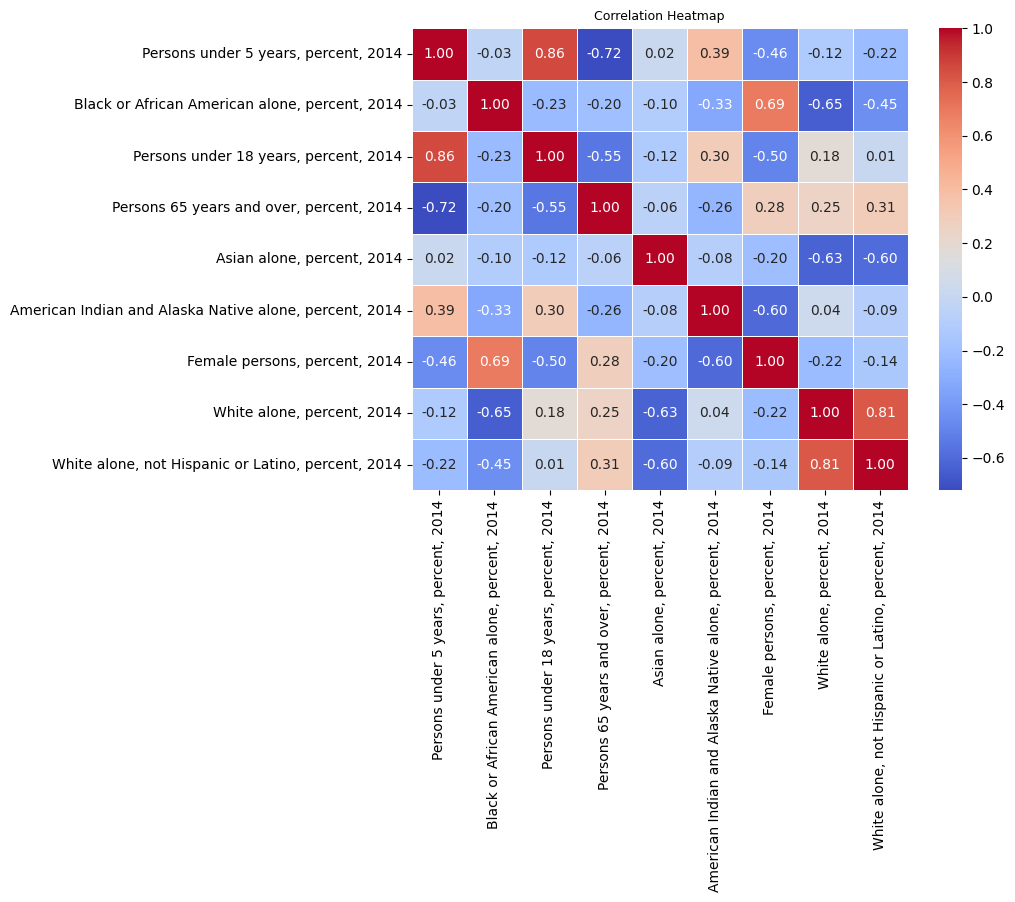

In [117]:
# Calculate correlation matrix
r_correlation_matrix_2 = respublican_votes_x_county_data[columns_for_demografic_profile_without_winner].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(r_correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=9)
plt.show()

From correlation matrix above we are able to see:\
- Strong correlation between Person under 5 years, percent, 2014 and Person under 18 years, percent, 2014.\
This correlation might be due to overlapping, 5 years people might be included in people under 18 years.
- Strong negative correlation between Person under 18 years, percent, 2014 and Person 65 years and over, percent 2014.\
Negative correlation shows due to age priorities regarding living area. 

In [118]:
X = respublican_votes_x_county_data[columns_for_demografic_profile_without_winner]
y = respublican_votes_x_county_data['winner']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 50.00%


Based on 9 features:

The XGBoost machine learning algorithm was utilized, yielding an accuracy result of 50.00%\
when predicting the winner based on nine selected features.\
This accuracy rate is relatively low like picking random, suggesting that features with strong high and strong negative correlations\
could be excluded due to biases.

## Conclusions
By knowing who won 2016 US president election (Donald Trumo) we were\
able to see Donald trump strong position across other republican candidates.\
We managed to describe each candidate voter and with AI imagines generator\
make portraits. 